# LOAN STATUS PREDICTION

In [53]:
import numpy as np
from numpy import *
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Importing the loan status prediction dataset from kaggle.

In [54]:
loan_dataset = pd.read_csv(r"train dataset.csv")

# _1.DATA VISUALIZATION_

In [55]:
loan_dataset.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [56]:
loan_dataset.shape

(614, 13)

In [57]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [58]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### OBSERVATION:
1.By seeing the above output cell,totally 6 columns has null values in 13 columns and the maximum null value is in the  credit history column.

2 . We didn't use the mean or mode imputation here.Because we cant make any approximation for loan amount or loan amount term.So, we simply drop them all thew nullvalues.
    

In [59]:
loan_dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

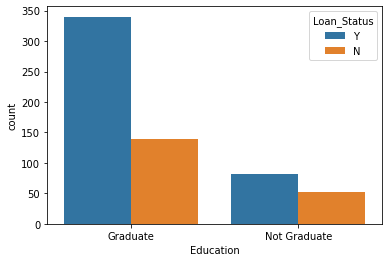

In [60]:
sns.countplot(x = "Education",hue = "Loan_Status", data = loan_dataset)

##### OBSERVATION:
1. Most of the graduates are getting loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

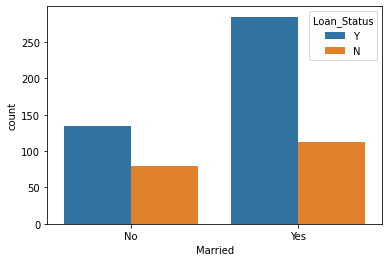

In [61]:
sns.countplot(x = "Married",hue = "Loan_Status", data = loan_dataset)

##### OBSERVATION:
1. Most of the married applicants are getting loan compared to the unmarried applicants.

(5.5, -0.5)

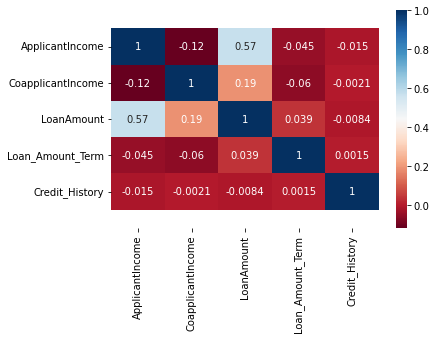

In [62]:
correlation=loan_dataset.corr()
ax=sns.heatmap(correlation,annot=True,cmap="RdBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

##### OBSERVATION:

     1.Applicant income and loan amount are highly correlated. Next to this the Coappplicat income and loan amount are also correlated.

# _2.PRE-PROCESSING_

Droping the null values from the dataset.

In [63]:
loan_dataset.dropna(inplace = True)

In [64]:
loan_dataset.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [65]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Applying label encoding for "loan status" column to convert the categorical variables into numerical variables.

In [66]:
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Converting "3+" to "4" in Dependents column, for our convinience.

In [67]:
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [68]:
loan_dataset.replace({"Dependents":{"3+":4}},inplace = True)

In [69]:
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Converting all categorical columns in the dataset into numerical values.

In [70]:
loan_dataset.replace({'Married':{"No":0,"Yes":1},'Gender':{"Male":1, "Female":0},'Self_Employed':{"No":0,"Yes":1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace = True)

In [71]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


(11.5, -0.5)

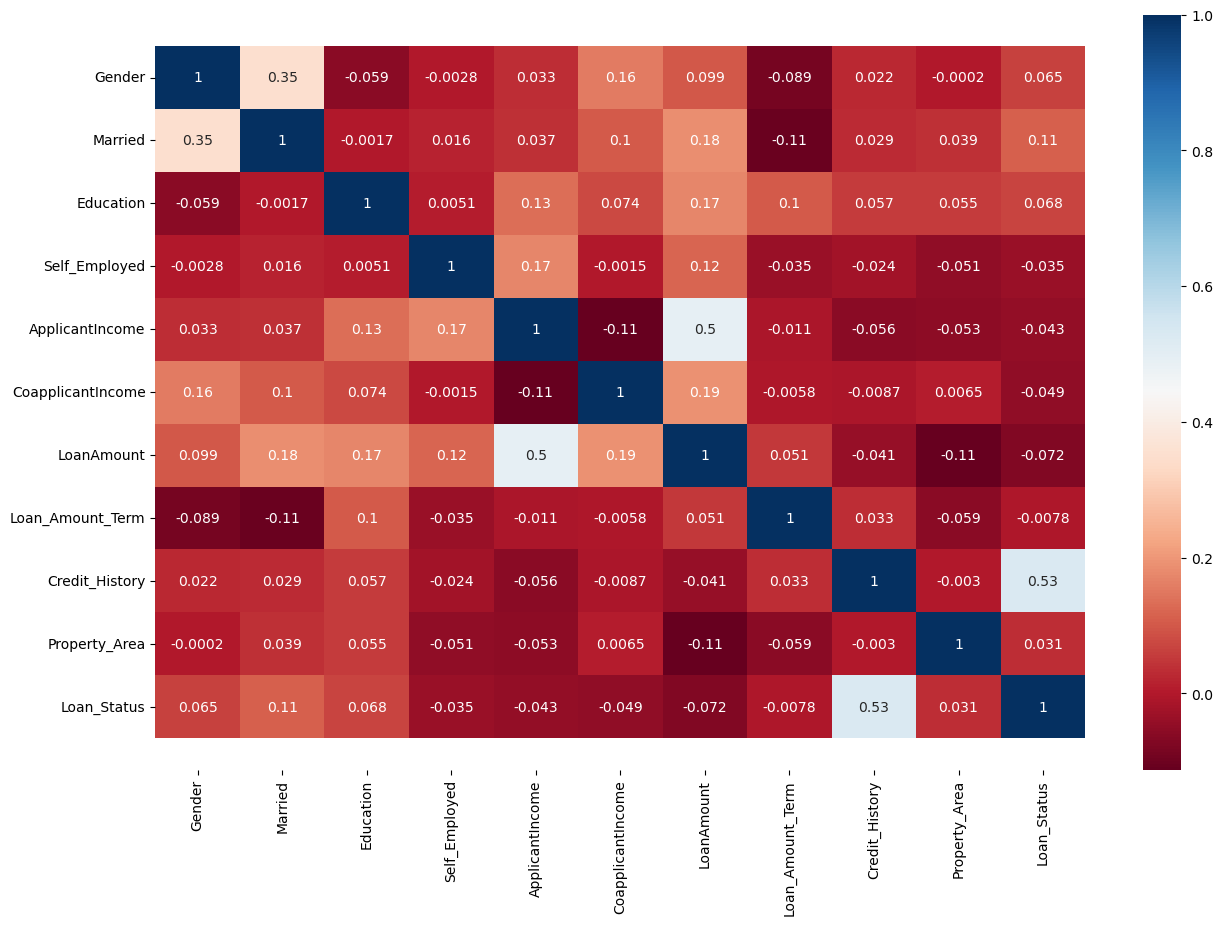

In [72]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)
correlation=loan_dataset.corr()
ax=sns.heatmap(correlation,annot=True,cmap="RdBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

Seperating the label from the dataset, here the 'Loan status' will be the label.

Loan ID is not useful for us.So we can drop that column and drop the Loan status column too.Because that is our output.

In [73]:
loan_dataset['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

We use the loan status as the output variable and we gonna predict this loan status for the new data in future.

In [74]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis = 1,)
Y = loan_dataset['Loan_Status']

Splitting the dataset into training data and testing data.

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify = Y,random_state = 3)

In [76]:
X.shape,X_train.shape,X_test.shape

((480, 11), (432, 11), (48, 11))

In [77]:
loan_dataset.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


# _3.TRAINING THE MODEL_

### (1).SUPPORT VECTOR MACHINE

In [78]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [79]:
cm = confusion_matrix(Y_test ,Y_pred)
cm

array([[ 5, 10],
       [ 0, 33]], dtype=int64)

Text(69.0, 0.5, 'True value')

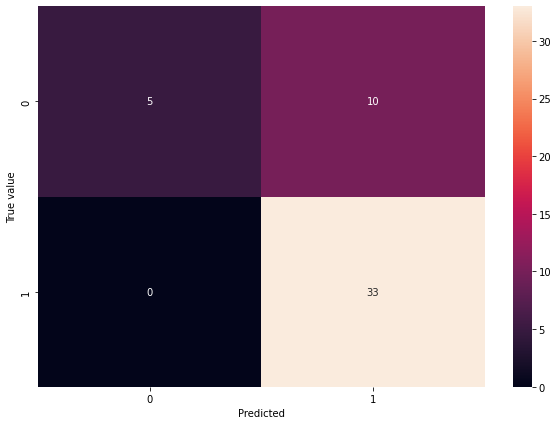

In [80]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [81]:
from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" %metrics.accuracy_score(Y_test, Y_pred))

Accuracy = 0.79


In [94]:
from sklearn.metrics import f1_score
F1_score_lr = metrics.f1_score(Y_test,Y_pred )
F1_score_lr

0.868421052631579

### Result: 
By fitting the SVM to the above pre-processed data set, I got accuracy =  0.79 and F1 score = 0.868421052631579 on predicted value.     
To increase the accuracy, I use Logistic regression next to this. 

### (2).LOGISTIC REGRESSION

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [84]:
Y_predict_lr = classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test, Y_predict_lr)
  
print ("Confusion Matrix : \n", cm_lr)

Confusion Matrix : 
 [[ 5 10]
 [ 0 33]]


Text(69.0, 0.5, 'True value')

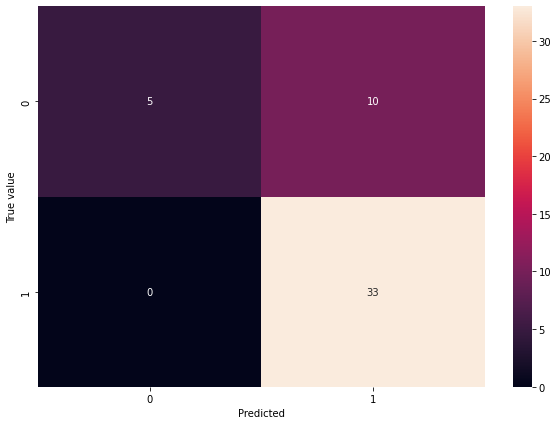

In [86]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_lr,annot = True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [87]:
from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" %metrics.accuracy_score(Y_test, Y_predict_lr))

Accuracy = 0.79


In [88]:
from sklearn.metrics import f1_score
F1_score_lr = metrics.f1_score(Y_test, Y_predict_lr)
F1_score_lr

0.868421052631579

### Result: 
At the end of using Logistic regression, I got accuracy =  0.79 and F1 score = 0.868421052631579 on predicted value. Which is same accuracy as we alredy obtained in SVM.

### (3).RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=40)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,Y_predict_rf)
cm

array([[ 6,  9],
       [ 4, 29]], dtype=int64)

Text(69.0, 0.5, 'True value')

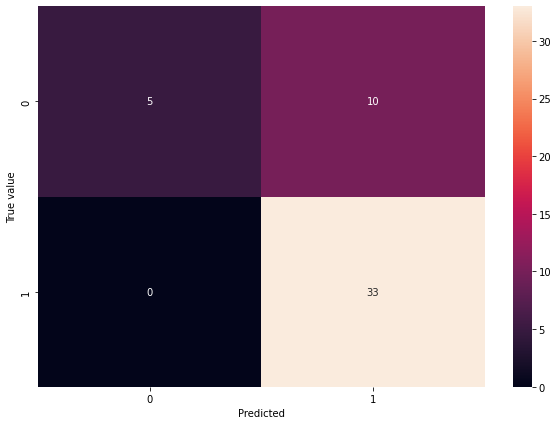

In [96]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_lr,annot = True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [90]:
Y_predict_rf = model.predict(X_test)
print ("Accuracy = %.2f" %metrics.accuracy_score(Y_test, Y_predict_rf))

Accuracy = 0.73


In [91]:
from sklearn.metrics import f1_score
F1_score_rf = metrics.f1_score(Y_test, Y_predict_rf)
F1_score_rf

0.8169014084507042

### Result: 
Here I tried Random forest for the same pre-processed dataset and obtained F1 score = 0.8169014084507042. Which is better than SVM and Logistic regression.

# Result: 
(1).SUPPORT VECTOR MACHINE --- 
Accuracy score = 0.79 ,
F1 score =  0.868421052631579
    

(2).LOGISTIC REGRESSION --- 
Accuracy = 0.79 ,
F1 score =  0.868421052631579
    
    
(3).RANDOM FOREST --- 
Accuracy = 0.73 ,
F1 score =  0.8169014084507042